## Regresja liniowa

W tym notebooku stworzymy model regresji liniowej dla zbioru danych o nieruchomościach w Bostonie - celem zadania jest przewidywanie cen domów na podstawie cech liczbowych

* napiszemy pojedynczy model regresji od podstaw z jedną zmienną niezależną
* użyjemy numpy do oszacowania współczynników regresji
* sprawdzimy poprawność regresji, używając RSME i współczynnika determinacji

Potem:

* napiszemy model regresji z wieloma zmiennymi od podstaw
* skorzystamy z klasy LinearRegression w sklearn, aby wykonać to samo zadanie i porównać wyniki



In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [15]:
boston_dataframe = pd.read_csv('boston.csv', index_col=0)

In [16]:
y = boston_dataframe.pop('y')

In [17]:
boston_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


Boston House Prices dataset
===========================

Notes
------
Data Set Characteristics:  
    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000 USD
        - PTRATIO  pupil-teacher ratio by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in 1000's USD

In [18]:
boston_dataframe.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03


# Prosta regresja liniowa

Postaramy się zbadać zależnośc liniową pomiędzy dwiemia zmiennymi, za pomocą prostej regresji z jedną zmienną. Użyjemy zmiennej **LSTAT** czyli odsetek osób z najgorzej opłacanych grup społecznych w danej dzielnicy. Spróbujemy przewidzieć za jej pomocą ceny domów

In [19]:
x = boston_dataframe.LSTAT

Prosta regresja jest wyrażana w sposób następujący:

\begin{equation*}
Y = \beta_0 + \beta_1X
\end{equation*}

$\beta_0$ wyraz wolny, który oznacza, jaką domyślną wratość ma przyjmować zmienna x

$\beta_1$ współczynnik kierunkowy - jak bardzo zmienia się y, jeśli x zmieni się o jedną jednostkę

Wyporowadzenie wzoru:
\begin{equation*}
\beta_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}
\end{equation*}

\begin{equation*}
\beta_0 = \bar{y} - \beta_1\bar{x}
\end{equation*}

Napiszemy to od zera:

In [20]:
mean_y = np.mean(y)
mean_x = np.mean(x)

Implementujemy równanie dla $\beta_1$

In [21]:
b1 = np.sum((x - mean_x) * (y - mean_y)) / np.sum(np.power(x - mean_x, 2))

Implementujemy równanie dla $\beta_0$

In [22]:
b0 = mean_y - b1 * mean_x

In [23]:
print('Slope paramater: {} \nIntercept:{}'.format(b1, b0))

Slope paramater: -0.9500493537579905 
Intercept:34.553840879383124


Mając taki wzór, możemy spróbować przewidzieć, jakie będą ceny nieruchomości, przy założeniu określonej wartości parametry LSTAT:

* 10
* 15
* 20

napiszemy funkcję, która używa naszego wzoru do przewidywania ceny.

In [27]:
def predict_simple_regression(lower_status_population):
    return b0 + lower_status_population * b1

In [28]:
predict_simple_regression(10)

25.053347341803217

In [29]:
predict_simple_regression(15)

20.303100573013268

In [31]:
predict_simple_regression(20)

15.552853804223314

Teraz możemy użyć wbudowanej funkcji matematycznej, żeby uzyskać ten sam efekt.

In [39]:
fit = np.polyfit(x,y,1)
fit_function = np.poly1d(fit) 

print(fit)

[-0.95004935 34.55384088]


Teraz możemy dokonywac predykcji z użyciem tej funkcji *fit_function*:

In [43]:
fit_function(10)

25.053347341803182

In [44]:
fit_function(15)

20.303100573013225

In [45]:
fit_function(20)

15.552853804223268

Możemy zrobić wykres dopasowania na podstawie uzyskanych wyników

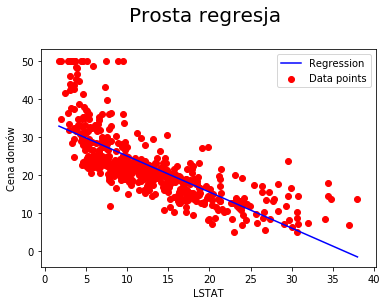

In [46]:
x_domain = np.linspace(np.min(x), np.max(x), 1000)
y_line = b0 + b1 * x_domain

# regression line
plt.plot(x_domain, y_line, color='blue', label='Regression')
# data points
plt.scatter(x, y, c='red', label='Data points')

plt.title('Prosta regresja \n', size=20)
plt.xlabel('LSTAT')
plt.ylabel('Cena domów')
plt.legend()
plt.show()

Ważnym współczynnikiem jest Błąd Średniokwadratowy

\begin{equation*}
RMSE = \sqrt{\sum_{i=1}^{m} \frac{1}{m} (\hat{y_i} - y_i)^2}
\end{equation*}

Żeby go policzyć musimy mieć wartości predykcji dla każdego punktu X

In [47]:
predictions = predict_simple_regression(x)
# let's print first 10 predictions
print(predictions[:10])

0    29.822595
1    25.870390
2    30.725142
3    31.760696
4    29.490078
5    29.604084
6    22.744727
7    16.360396
8     6.118864
9    18.307997
Name: LSTAT, dtype: float64


Teraz możemy napisać funkcję implementującą RMSE wprost

In [48]:
def rmse(y_true, predictions):
    return np.sqrt(np.sum((1 / len(predictions)) * np.power((predictions - y_true), 2)))

In [49]:
rmse(predictions, y)

6.203464131426423

Możęmy też użyć funkcji wbudowanej w Sklearn, żeby uzyskać to samo

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
print('MSE: {}'.format(mean_squared_error(predictions, y)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(predictions, y))))

MSE: 38.48296722989415
RMSE: 6.20346413142642


Istnieje także powszechnie używana miara jakości dopasowania - $R^2$

\begin{equation}
SS_t = \sum_{i=1}^{m} (y_i - \bar{y})^2
\end{equation}
\begin{equation}
SS_r = \sum_{i=1}^{m} (y_i - \hat{y_i})^2
\end{equation}
\begin{equation}
R^2 \equiv 1 - \frac{SS_r}{SS_t}
\end{equation}

$R^2$ przyjmuje wartości pomiędzy 0 a 1 i może być używana do porównywania modeli regresji. 

Napiszmy funkcję obliczającą ten współczynnik

In [52]:
def r_squared_from_scratch(y_true, predictions):
    sst = np.sum(np.power(y_true - np.mean(y_true), 2))
    ssr = np.sum(np.power(y_true - predictions, 2))
    return 1 - ssr/sst

In [53]:
r_squared_from_scratch(y, predictions)

0.54414629758648

To samo z użyciem numpy

In [55]:
from  sklearn.metrics import r2_score
print(r2_score(y, predictions))

0.5441462975864797


## Multiple linear regression

Możemy rozszerzyć prosty model liniowy na przypadek, gdy mamy więcej zmiennych niezależnych. Formuła uzyskuje następującą postać:

\begin{equation}
Y = \beta_0 + \beta_1x_1 + \beta_1x_2 + … + \beta_nx_n
\end{equation}

Jest to zwykłe równanie macierzowe, który można rozwiązać przy użyciu algebry liniowej

\begin{equation}
\beta = (X^TX)^{-1}X^Ty
\end{equation}

gdzie X jest macierzą zmiennych niezależnych z dodaną jedną kolumną dla $\beta_0$ - kolumna zawiera same jedynki i odpowieada za "wartość domyślną", czyli gdy nie ma żadnych innych wartośći

Dodajmy kolumnę dla $\beta_0$

In [57]:
boston_dataframe['b0'] = 1

Teraz napiszemy funkcję, która wylicza parametry $\beta$

Kilka przydatnych funkcji pomocniczych:

* np.linalg.inv - liczy odwrotność macierzy
* .transpose() - transponowanie macierzy
* .dot() - iloczyn skalarny

In [60]:
coeffs = np.linalg.inv(boston_dataframe.transpose().dot(boston_dataframe)).dot(boston_dataframe.transpose()).dot(y)

Wyświetlmy oszacowane współczynniki

In [61]:
coeffs

array([-1.19615762e-01,  4.69055158e-02,  1.37963626e-02,  2.84495457e+00,
       -1.87943852e+01,  3.65111680e+00,  3.70628288e-03, -1.49043734e+00,
        2.88259456e-01, -1.26785144e-02, -9.38088171e-01, -5.53331515e-01,
        4.16979510e+01])

Wyświetlmy współczynniki wraz z nazwami zmienych

In [62]:
pd.DataFrame({'names': boston_dataframe.columns.tolist(), 'coeffs': coeffs})

,coeffs,names
0,-0.119616,CRIM
1,0.046906,ZN
2,0.013796,INDUS
3,2.844955,CHAS
4,-18.794385,NOX
5,3.651117,RM
6,0.003706,AGE
7,-1.490437,DIS
8,0.288259,RAD
9,-0.012679,TAX


Teraz możemy zamodelować to samo za pomocą sklearn

In [63]:
from sklearn import linear_model

# Tworzymy obiekt regresji liniowej - poniważ już dodaliśmy kolumnę z jedynkami, ustawiamy fit_intercept=False
regr = linear_model.LinearRegression(fit_intercept=False)

regr.fit(boston_dataframe, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

Pobieramy współczynniki .coef_ 

In [64]:
regr.coef_

array([-1.19615762e-01,  4.69055158e-02,  1.37963626e-02,  2.84495457e+00,
       -1.87943852e+01,  3.65111680e+00,  3.70628288e-03, -1.49043734e+00,
        2.88259456e-01, -1.26785144e-02, -9.38088171e-01, -5.53331515e-01,
        4.16979510e+01])

In [65]:
pd.DataFrame({'names': boston_dataframe.columns.tolist(), 'coeffs': regr.coef_})

,coeffs,names
0,-0.119616,CRIM
1,0.046906,ZN
2,0.013796,INDUS
3,2.844955,CHAS
4,-18.794385,NOX
5,3.651117,RM
6,0.003706,AGE
7,-1.490437,DIS
8,0.288259,RAD
9,-0.012679,TAX


Teraz możemy dokonać predykcji dla danych za pomocą tak wyszkolonego modelu

In [66]:
predictions_scikit = regr.predict(boston_dataframe)

Sprawdzamy $R^2$

In [67]:
print(regr.score(boston_dataframe, y))
print(r2_score(y, predictions_scikit))

0.7341487741330596
0.7341487741330596
